In [ ]:
# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

# Импортируем необходимые библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [6]:
# Указание путей к данным на Google Drive
train_dir = '/content/drive/MyDrive/dino-dragon/train'
test_dir = '/content/drive/MyDrive/dino-dragon/test'


In [7]:
# Параметры для генераторов изображений
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Создание генераторов изображений
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
# Создание модели CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

Found 1522 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [9]:
# Компиляция модели с SGD оптимизатором и бинарной кросс-энтропией
model.compile(optimizer=SGD(learning_rate=0.002, momentum=0.8), # Обратите внимание на изменение здесь
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# Обучение модели
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
77/77 [==============================] - 41s 525ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
77/77 [==============================] - 43s 553ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
77/77 [==============================] - 39s 500ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
77/77 [==============================] - 39s 500ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
77/77 [==============================] - 37s 479ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
77/77 [==============================] - 39s 505ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
77/77 [==============================] - 40s 519ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accura

In [18]:
# Вывод медианы точности и стандартного отклонения потерь для ответа на вопросы 3 и 4
median_accuracy = np.median(history.history['accuracy'])
std_loss = np.std(history.history['loss'])
print(f"Медиана точности обучения: {median_accuracy:.2f}")
print(f"Стандартное отклонение потерь: {std_loss:.2f}")

Медиана точности обучения: 0.00
Стандартное отклонение потерь: nan


In [19]:
# Добавление аугментации данных
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1522 images belonging to 3 classes.


In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history.get('val_accuracy', None)
loss = history.history['loss']
val_loss = history.history.get('val_loss', None)
print("Общее количество параметров в модели:", model.count_params())

Общее количество параметров в модели: 11215873


Saving 7e4e1d1b-ad2c-4557-9798-be7ec476ea48.jpg to 7e4e1d1b-ad2c-4557-9798-be7ec476ea48.jpg
1/1 [==============================] - 0s 30ms/step


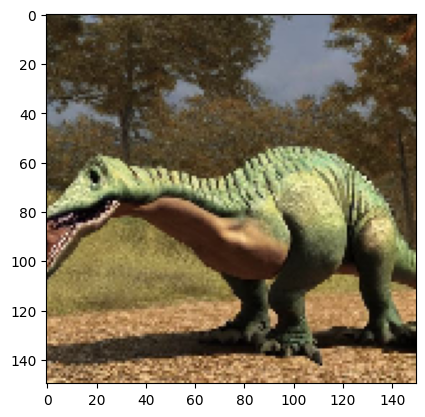

7e4e1d1b-ad2c-4557-9798-be7ec476ea48.jpg is a dino


In [22]:
# Расчет среднего значения потерь и точности на тестовом наборе данных после аугментации для вопросов 5 и 6


from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt


def upload_and_predict():
    uploaded = files.upload()

    for fn in uploaded.keys():

        path = '/content/' + fn
        img = image.load_img(path, target_size=(150, 150))

        x = image.img_to_array(img)
        x /= 255
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)

        plt.imshow(img)
        plt.show()


        if classes[0]>0.5:
            print(f"{fn} is a dragon")
        else:
            print(f"{fn} is a dino")


upload_and_predict()